In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import statsmodels.formula.api as smf
import statsmodels.api as sm 
from stargazer.stargazer import Stargazer


In [18]:
df = pd.read_csv("data/df_final.csv")
df.head()

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen


# 5. Wie hoch war der durchschnittliche Umsatz pro Bundesland?

Wir filtern als Erstes nach den Reihen, die einen Preis > 0 haben. 

In [19]:
df_umsatz = df[df["Preis"] > 0]
df_umsatz

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


Filtern nach Umsatz und Niederlassung

In [20]:
df_umsatz = df_umsatz[["Preis" , "Niederlassung"]]
df_umsatz

,Preis,Niederlassung
0,88160.31,Bayern
1,103145.70,Berlin
2,80565.16,Baden-Württemberg
3,83949.89,Bayern
4,93781.58,Hessen
...,...,...
1099,103751.58,Thüringen
1100,64230.98,Niedersachsen
1101,103123.57,Berlin
1102,49215.87,Baden-Württemberg


Jetzt berechnen wir den durchschnittlichen Umsatz pro Bundesland in dem wir zu erst gruppieren (groupy function) und dann auf jede Gruppe den Durchschnitt berechnen (mean function)

In [21]:
avg_umsatz = df_umsatz.groupby("Niederlassung")["Preis"].mean().round(2).reset_index().sort_values(by = "Preis")
avg_umsatz

,Niederlassung,Preis
4,Hamburg,85549.50
5,Hessen,85864.93
3,Brandenburg,86673.64
6,Niedersachsen,87963.31
7,Nordrhein-Westfalen,88633.27
1,Bayern,89344.31
8,Sachsen,89455.08
2,Berlin,89584.98
9,Thüringen,90816.99
0,Baden-Württemberg,90969.56


Balkendiagramm zur besseren Verdeutlichung der Umsätze pro Bundesland

In [22]:
figure = px.bar(avg_umsatz,
       x =  "Preis", 
       y = "Niederlassung",
       title = "Durchschnittlicher Umsatz pro Bundesland",
       color = "Niederlassung",)
figure.update_layout(width = 1200,
                     height = 400)
figure

# 10. Wie hoch ist das Durchschnittseinkommen unserer Kunden ? 

In [23]:
df_kunden = df[df["Preis"] > 0]
df_kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


In [24]:
avg_einkommen_kunden = df_kunden["Einkommen"].mean().round(2)
avg_einkommen_kunden

58898.47

# 11. Wie hoch ist die Korrelation (Pearson-Korrelation) zwischen den Variablen Alter, Einkommen, Preis und Zeit? (nur für die Kunden) 

In [25]:
df_kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


In [26]:
df_corr_variables = df_kunden[["Alter" , "Einkommen" , "Preis" , "Zeit"]]
df_corr_variables


,Alter,Einkommen,Preis,Zeit
0,64,66894.0,88160.31,43.0
1,54,77644.0,103145.70,40.0
2,55,44341.0,80565.16,37.0
3,49,67271.0,83949.89,42.0
4,46,49832.0,93781.58,41.0
...,...,...,...,...
1099,70,69581.0,103751.58,51.0
1100,38,48301.0,64230.98,33.0
1101,67,63547.0,103123.57,41.0
1102,37,32686.0,49215.87,36.0


Erstellen der Heatmap um die Pearson Korrelation zu visualisieren

<Axes: >

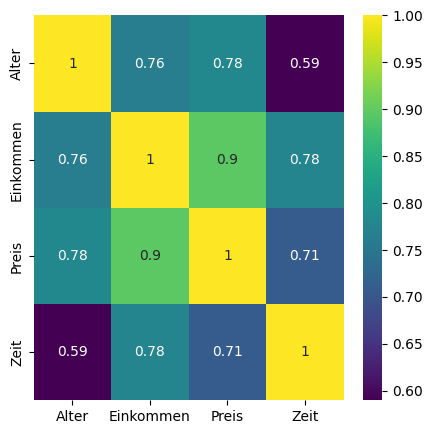

In [27]:
plt.figure(figsize= (5,5))

sns.heatmap(
    df_corr_variables.corr(), #Korellationskoeffizienten berechnen und als Daten für Heatmap verwenden
    cmap = "viridis",
    annot = True
)



# 12. Wie ist die variable Zeit verteilt? (Kunden und Besucher)

In [28]:
df_zeit = df[["Zeit"]]
df_zeit

,Zeit
0,43.0
1,40.0
2,37.0
3,42.0
4,41.0
...,...
1990,48.0
1991,34.0
1992,23.0
1993,32.0


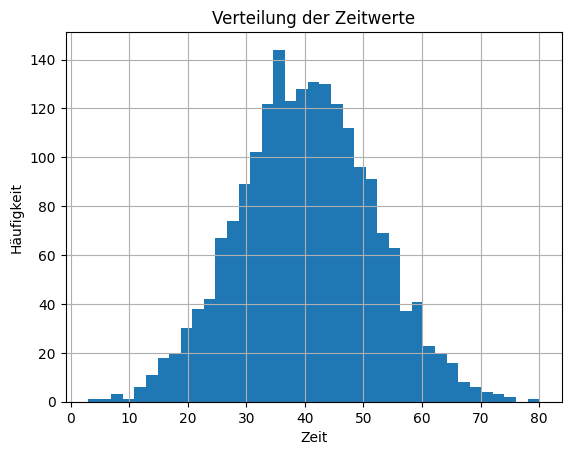

In [29]:
df['Zeit'].hist(bins=39)
plt.xlabel('Zeit')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Zeitwerte')
plt.show()

Die Verteilung der Zeit ähnelt einer Normalverteilung. 

# 14. Welches sind die sozioökonomischen Merkmale der Kunden, die den Kaufpreis beeinflussen? Wählen Sie die geeigneten abhängigen Variablen aus und schätzen Sie eine Regression unter Verwendung der geeigneten Methode.

Sozioökonomische Merkmale der Kunden, die den Kaufpreis beeinflussen sind : Einkommen und Alter

In [30]:
df_kunden

,Alter,Einkommen,Preis,Geschlecht,Zeit,KundeNr,Niederlassung
0,64,66894.0,88160.31,1.0,43.0,K0310,Bayern
1,54,77644.0,103145.70,1.0,40.0,K1042,Berlin
2,55,44341.0,80565.16,0.0,37.0,K0382,Baden-Württemberg
3,49,67271.0,83949.89,0.0,42.0,K0498,Bayern
4,46,49832.0,93781.58,0.0,41.0,K0552,Hessen
...,...,...,...,...,...,...,...
1099,70,69581.0,103751.58,1.0,51.0,K0467,Thüringen
1100,38,48301.0,64230.98,1.0,33.0,K0122,Niedersachsen
1101,67,63547.0,103123.57,1.0,41.0,K1045,Berlin
1102,37,32686.0,49215.87,1.0,36.0,K1096,Baden-Württemberg


In [31]:
model1 = smf.ols("Preis ~ Alter + Einkommen + Geschlecht" , data = df_kunden).fit()
Stargazer([model1])